<a href="https://colab.research.google.com/github/harishmuh/COVID19_Prediction/blob/main/COVID19_symptoms_prediction_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![COVID19](https://kominfosandi.kamparkab.go.id/wp-content/uploads/2021/08/banner.png)

# **Corona Virus (COVID-19) classification**



## **Business understanding**

**Project Background & Context**

The COVID-19 pandemic created an urgent need for governments and healthcare institutions to quickly and accurately identify individuals who are infected. Diagnostic testing (e.g., PCR or antigen tests) is the gold standard, but these tests can be resource-intensive, costly, and sometimes delayed in reporting results.

The dataset provided by the Ministry of Health contains demographic information (age group, gender), reported symptoms (such as cough, fever, sore throat, shortness of breath, headache), and testing context (contact history, travel, or other indications), along with the laboratory-confirmed test results (corona_result).

By leveraging machine learning, we aim to build a predictive model that estimates the likelihood of a positive COVID-19 test result based on available features before laboratory confirmation. Such a model may support public health decision-making by:


* Assisting in preliminary assesment of suspected cases that can support critical medical staff decision.

* Prioritizing individuals (based on symptoms) for testing when resources are limited.


**Problem Statement**

When pandemic happens, laboratory test capacity can be limited, and not all individuals can be tested immediately. In addition, the remote and isolated area that lack of healthcare facilities, may not be able to provide the test.



The Ministry of Health requires a data-driven approach to:

* Predict whether a patient is likely to test positive for COVID-19 based on symptoms, demographics, and test indication.

* Optimize the allocation of testing resources by prioritizing high-risk individuals.

* Improve early detection and isolation of suspected positive cases, reducing the spread of infection.

Question:
>How can we use available patient features (symptoms, demographics, and exposure context) to build a classification model that predicts the probability of a positive COVID-19 test result?

**Problem statement**

* How do features influence the positive COVID-19 test result?
* What is the performance of machine learning models on unseen data and whic model is most suitable for potential deployment in apps?
* Which features are most important to the model?


**Edited**

### **Project Background & Context**

The COVID-19 pandemic created an urgent need to rapidly identify infected individuals. While PCR and antigen tests are reliable, they are resource-intensive and may not be immediately available—especially in remote areas with limited healthcare facilities.

The Ministry of Health dataset includes demographics (age group, gender), symptoms (cough, fever, sore throat, shortness of breath, headache), and testing context (contact history, travel, or other indications), along with laboratory-confirmed test results.

By applying machine learning, we aim to develop a model that predicts the likelihood of a positive COVID-19 result using these features. This can support healthcare providers by:

* Assisting in preliminary assessment of suspected cases.

* Prioritizing testing when resources are limited.



### **Problem Statement**

* How do demographic, symptom, and exposure features influence COVID-19 test results?

* Which machine learning model achieves the best performance on unseen data?

* Which features contribute most to prediction accuracy?

### **Analytical Approach**

* Data Understanding & Preparation – Explore the dataset, check missing values, and encode categorical variables.

* Feature Engineering – Transform features (e.g., impute missing demographics, create binary symptom indicators).

* Model Development – Train multiple classification models (e.g., logistic regression, random forest, gradient boosting) to predict COVID-19 positivity.

* Model Evaluation – Compare models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to handle class imbalance.

* Interpretability – Identify the most influential features driving predictions (e.g., SHAP values, feature importance).

* Deployment Consideration – Assess feasibility of using the best-performing model in healthcare workflows to support decision-making.

## **Data Understanding**

**Initial setup**

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.8 MB/s eta 0:00:00


In [2]:
# # Importing libraries

# # data manipulation
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import missingno as msno
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.preprocessing import LabelEncoder

# # machine learning models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.feature_selection import RFE,SelectFromModel

# # Metrics and preprocessing
# from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import classification_report
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import SelectKBest
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import KFold, cross_val_score

# # Preprocessing
# import category_encoders as ce
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from category_encoders import BinaryEncoder, OrdinalEncoder
# from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
# from imblearn.pipeline import Pipeline


# # Hyperparameter tunning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# from matplotlib import pyplot
# # the permutation based importance
# import seaborn as sns
# from sklearn.inspection import permutation_importance


# # Warning
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Import required libraries

# data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier #deleted
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Model evaluation, metrics, hyperparameter tunning
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.base import clone
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Settings
plt.style.use('ggplot')

In [4]:
# Loading dataset
COVID19_url = 'https://raw.githubusercontent.com/harishmuh/COVID19_Prediction/refs/heads/main/dataset/Covid_19_Dataset.csv'
data = pd.read_csv(COVID19_url)
data.shape

(278848, 10)

In [6]:
# First rows review
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


In [5]:
# Columns
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [6]:
# Data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


**Dataset Description**






| Attribute | Description | Unique Values |
| :--- | :--- | :--- |
| **test_date** | The date when the nasal/oral swab sample was collected from the individual for COVID-19 testing. | YYYY-MM-DD format (e.g., 2020-04-30) |
| **cough** | Indicates if the individual reported or was observed to have a cough symptom at the time of testing. | `0` = No cough symptom reported<br>`1` = Cough symptom present |
| **fever** | Indicates if the individual reported or was observed to have a fever at the time of testing. | `0` = No fever reported<br>`1` = Fever present |
| **sore_throat** | Indicates if the individual reported or was observed to have a sore throat at the time of testing. | `0` = No sore throat reported<br>`1` = Sore throat present |
| **shortness_of_breath** | Indicates if the individual reported or was observed to have difficulty breathing. This is a sign of more severe respiratory involvement. | `0` = No shortness of breath reported<br>`1` = Shortness of breath present |
| **head_ache** | Indicates if the individual reported or was observed to have a headache at the time of testing. | `0` = No headache reported<br>`1` = Headache present |
| **corona_result** | The result of the PCR (Polymerase Chain Reaction) test for the SARS-CoV-2 virus. | `negative` = Virus not detected<br>`positive` = Virus detected<br>`other` = Inconclusive, invalid, or voided test |
| **age_60_and_above** | A risk-based age categorization indicating if the individual is in the higher-risk age group. | `No` = Individual is under 60 years old<br>`Yes` = Individual is 60 years or older<br>`None` = Age data was missing or not recorded |
| **gender** | The gender of the individual tested for COVID-19. | `female` = Female individual<br>`male` = Male individual<br>`None` = Gender data was missing or not recorded |
| **test_indication** | The primary reason or exposure category that prompted the COVID-19 test. | `Abroad` = Testing due to return from international travel<br>`Contact with confirmed` = Testing due to known exposure to a confirmed case<br>`Other` = All other reasons (symptoms, general screening, etc.) |


**Key Notes for Analysis**:
- **Target Variable**: `corona_result` is typically the target for predictive modeling (classifying positive vs negative cases)
- **Missing Values**: `None` values represent missing data.
- **Symptoms Data**: Symptom fields are based on self-reporting or initial observation at time of testing
- **Data Source**: Israeli Ministry of Health (original source:[data.go.il](https://data.gov.il/dataset/covid-19))

| Attribute | Description | Unique Values |
| :--- | :--- | :--- |
| **test_date** | Date of sample collection for COVID-19 test. | YYYY-MM-DD (e.g., 2020-04-30) |
| **cough** | Whether the individual had a cough. | `0` = No<br>`1` = Yes |
| **fever** | Whether the individual had a fever. | `0` = No<br>`1` = Yes |
| **sore_throat** | Whether the individual had a sore throat. | `0` = No<br>`1` = Yes |
| **shortness_of_breath** | Whether the individual had breathing difficulty. | `0` = No<br>`1` = Yes |
| **head_ache** | Whether the individual had a headache. | `0` = No<br>`1` = Yes |
| **corona_result** | PCR test result for SARS-CoV-2. | `negative`, `positive`, `other` |
| **age_60_and_above** | Whether the individual was 60+. | `No`, `Yes`, `None` |
| **gender** | Gender of the individual. | `female`, `male`, `None` |
| **test_indication** | Reason for testing. | `Abroad`, `Contact`, `Other` |


In [7]:
# Displaying dimension of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  278848
Number of Attributes:  10


### **Unique values assesment**

In [8]:
# Unique values
# Check data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,test_date,object,0.000000,False,51,"[2020-04-30, 2020-04-29, 2020-04-28, 2020-04-2..."
1,cough,float64,0.090372,False,2,"[0.0, 1.0, nan]"
2,fever,float64,0.090372,False,2,"[0.0, 1.0, nan]"
3,sore_throat,float64,0.000359,False,2,"[0.0, 1.0, nan]"
4,shortness_of_breath,float64,0.000359,False,2,"[0.0, 1.0, nan]"
5,head_ache,float64,0.000359,False,2,"[0.0, 1.0, nan]"
6,corona_result,object,0.000000,False,3,"[negative, positive, other]"
7,age_60_and_above,object,45.659284,False,2,"[nan, Yes, No]"
8,gender,object,7.015650,False,2,"[female, male, nan]"
9,test_indication,object,0.000000,False,3,"[Other, Abroad, Contact with confirmed]"


**Statistical descriptive**

In [9]:
# Statistical descriptive
display(data.describe().T, data.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
cough,278596.0,0.151574,0.358608,0.0,0.0,0.0,0.0,1.0
fever,278596.0,0.078077,0.268294,0.0,0.0,0.0,0.0,1.0
sore_throat,278847.0,0.006907,0.082821,0.0,0.0,0.0,0.0,1.0
shortness_of_breath,278847.0,0.005655,0.074990,0.0,0.0,0.0,0.0,1.0
head_ache,278847.0,0.008657,0.092640,0.0,0.0,0.0,0.0,1.0


,count,unique,top,freq
test_date,278848,51,2020-04-20,10921
corona_result,278848,3,negative,260227
age_60_and_above,151528,2,No,125703
gender,259285,2,female,130158
test_indication,278848,3,Other,242741


**Key Insights**

* Symptoms: Most individuals reported no symptoms.

  * Cough (15%) and fever (8%) are the most common.

  * Other symptoms (sore throat, shortness of breath, headache) are <1% each.

* Corona Result: Highly imbalanced → ~93% negative, few positives.

* Age 60+: Data missing for ~46%; among available, majority are not 60+.

* Gender: Missing ~7%; slightly more females than males.

* Test Indication: Mostly “Other” (87%), with few “Contact” or “Abroad”.

* Test Date: Covers 51 days; Most often on 2020-04-20.

bisa dihapus

**Symptom Variables (cough, fever, sore throat, shortness_of_breath, head_ache)**

* All symptom variables are binary (0/1).

* Cough is the most frequently reported symptom:

  * Mean = 15.2% → about 1 in 6 individuals reported cough.

* Fever is the second most common:

  * Mean = 7.8% → about 1 in 13 individuals reported fever.

* Other symptoms are much less frequent:

  * Sore throat = 0.7%

  * Shortness of breath = 0.6%

  * Headache = 0.9%

* The median (50%) for all symptoms is 0, showing that most individuals did not report these symptoms.

**Demographics & Test Information**

* Test Date

  * Data covers 51 unique days.

  * Most frequent test date: 2020-04-20 with ~10,921 tests.

* Corona Result

  * 3 categories: negative, positive, other.

  * Majority are negative (260,227 out of 278,848 ≈ 93%).

* Age 60 and Above

  * Available for only 151,528 individuals (missing for ~45.7%).

  * Among available values, “No” (not 60+) dominates with 125,703 cases (~83%).

* Gender

  * Reported for 259,285 individuals (missing ~7%).

  * Slightly more female (130,158 vs. males).

* Test Indication

  * 3 categories: Contact with confirmed, Abroad, Other.

  * Most tests were classified as “Other” (242,741, ~87%).

Now, we will turn some numerical features into categorical for improving our data exploration process.

In [10]:
data['cough'] = data['cough'].replace({1: 'Yes', 0: 'No'})
data['fever'] = data['fever'].replace({1: 'Yes', 0: 'No'})
data['sore_throat'] = data['sore_throat'].replace({1: 'Yes', 0: 'No'})
data['shortness_of_breath'] = data['shortness_of_breath'].replace({1: 'Yes', 0: 'No'})
data['head_ache'] = data['head_ache'].replace({1: 'Yes', 0: 'No'})

In [11]:
# Unique value assesment # for EDA

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value_sum': data.isna().sum(),
    'missing_value_pct': round((data.isna().sum() / len(data)) * 100, 2),
    'negative_value': [(data[col] < 0).any() if data[col].dtype in ['int64', 'float64'] else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
test_date,test_date,object,0,0.00,False,51,"[2020-04-30, 2020-04-29, 2020-04-28, 2020-04-2..."
cough,cough,object,252,0.09,False,2,"[No, Yes, nan]"
fever,fever,object,252,0.09,False,2,"[No, Yes, nan]"
sore_throat,sore_throat,object,1,0.00,False,2,"[No, Yes, nan]"
shortness_of_breath,shortness_of_breath,object,1,0.00,False,2,"[No, Yes, nan]"
head_ache,head_ache,object,1,0.00,False,2,"[No, Yes, nan]"
corona_result,corona_result,object,0,0.00,False,3,"[negative, positive, other]"
age_60_and_above,age_60_and_above,object,127320,45.66,False,2,"[nan, Yes, No]"
gender,gender,object,19563,7.02,False,2,"[female, male, nan]"
test_indication,test_indication,object,0,0.00,False,3,"[Other, Abroad, Contact with confirmed]"


In [12]:
# Differentiating columns based on their type (numerical, categorical)


numerical = [var for var in data.columns if data[var].dtypes in ['float64', 'int64']]

categorical_EDA = [
    var for var in data.drop(columns='test_date').columns
    if data[var].dtypes == 'object' or (data[var].dtypes == 'category')  #
]

# Display the results in a DataFrame
pd.set_option('max_colwidth', None)
column_types = pd.DataFrame({
    "Column Type": ["Categorical", "Numerical"],
    "Columns": [categorical_EDA, numerical]
})

column_types


,Column Type,Columns
0,Categorical,"[cough, fever, sore_throat, shortness_of_breath, head_ache, corona_result, age_60_and_above, gender, test_indication]"
1,Numerical,[]


**Categorical variables**

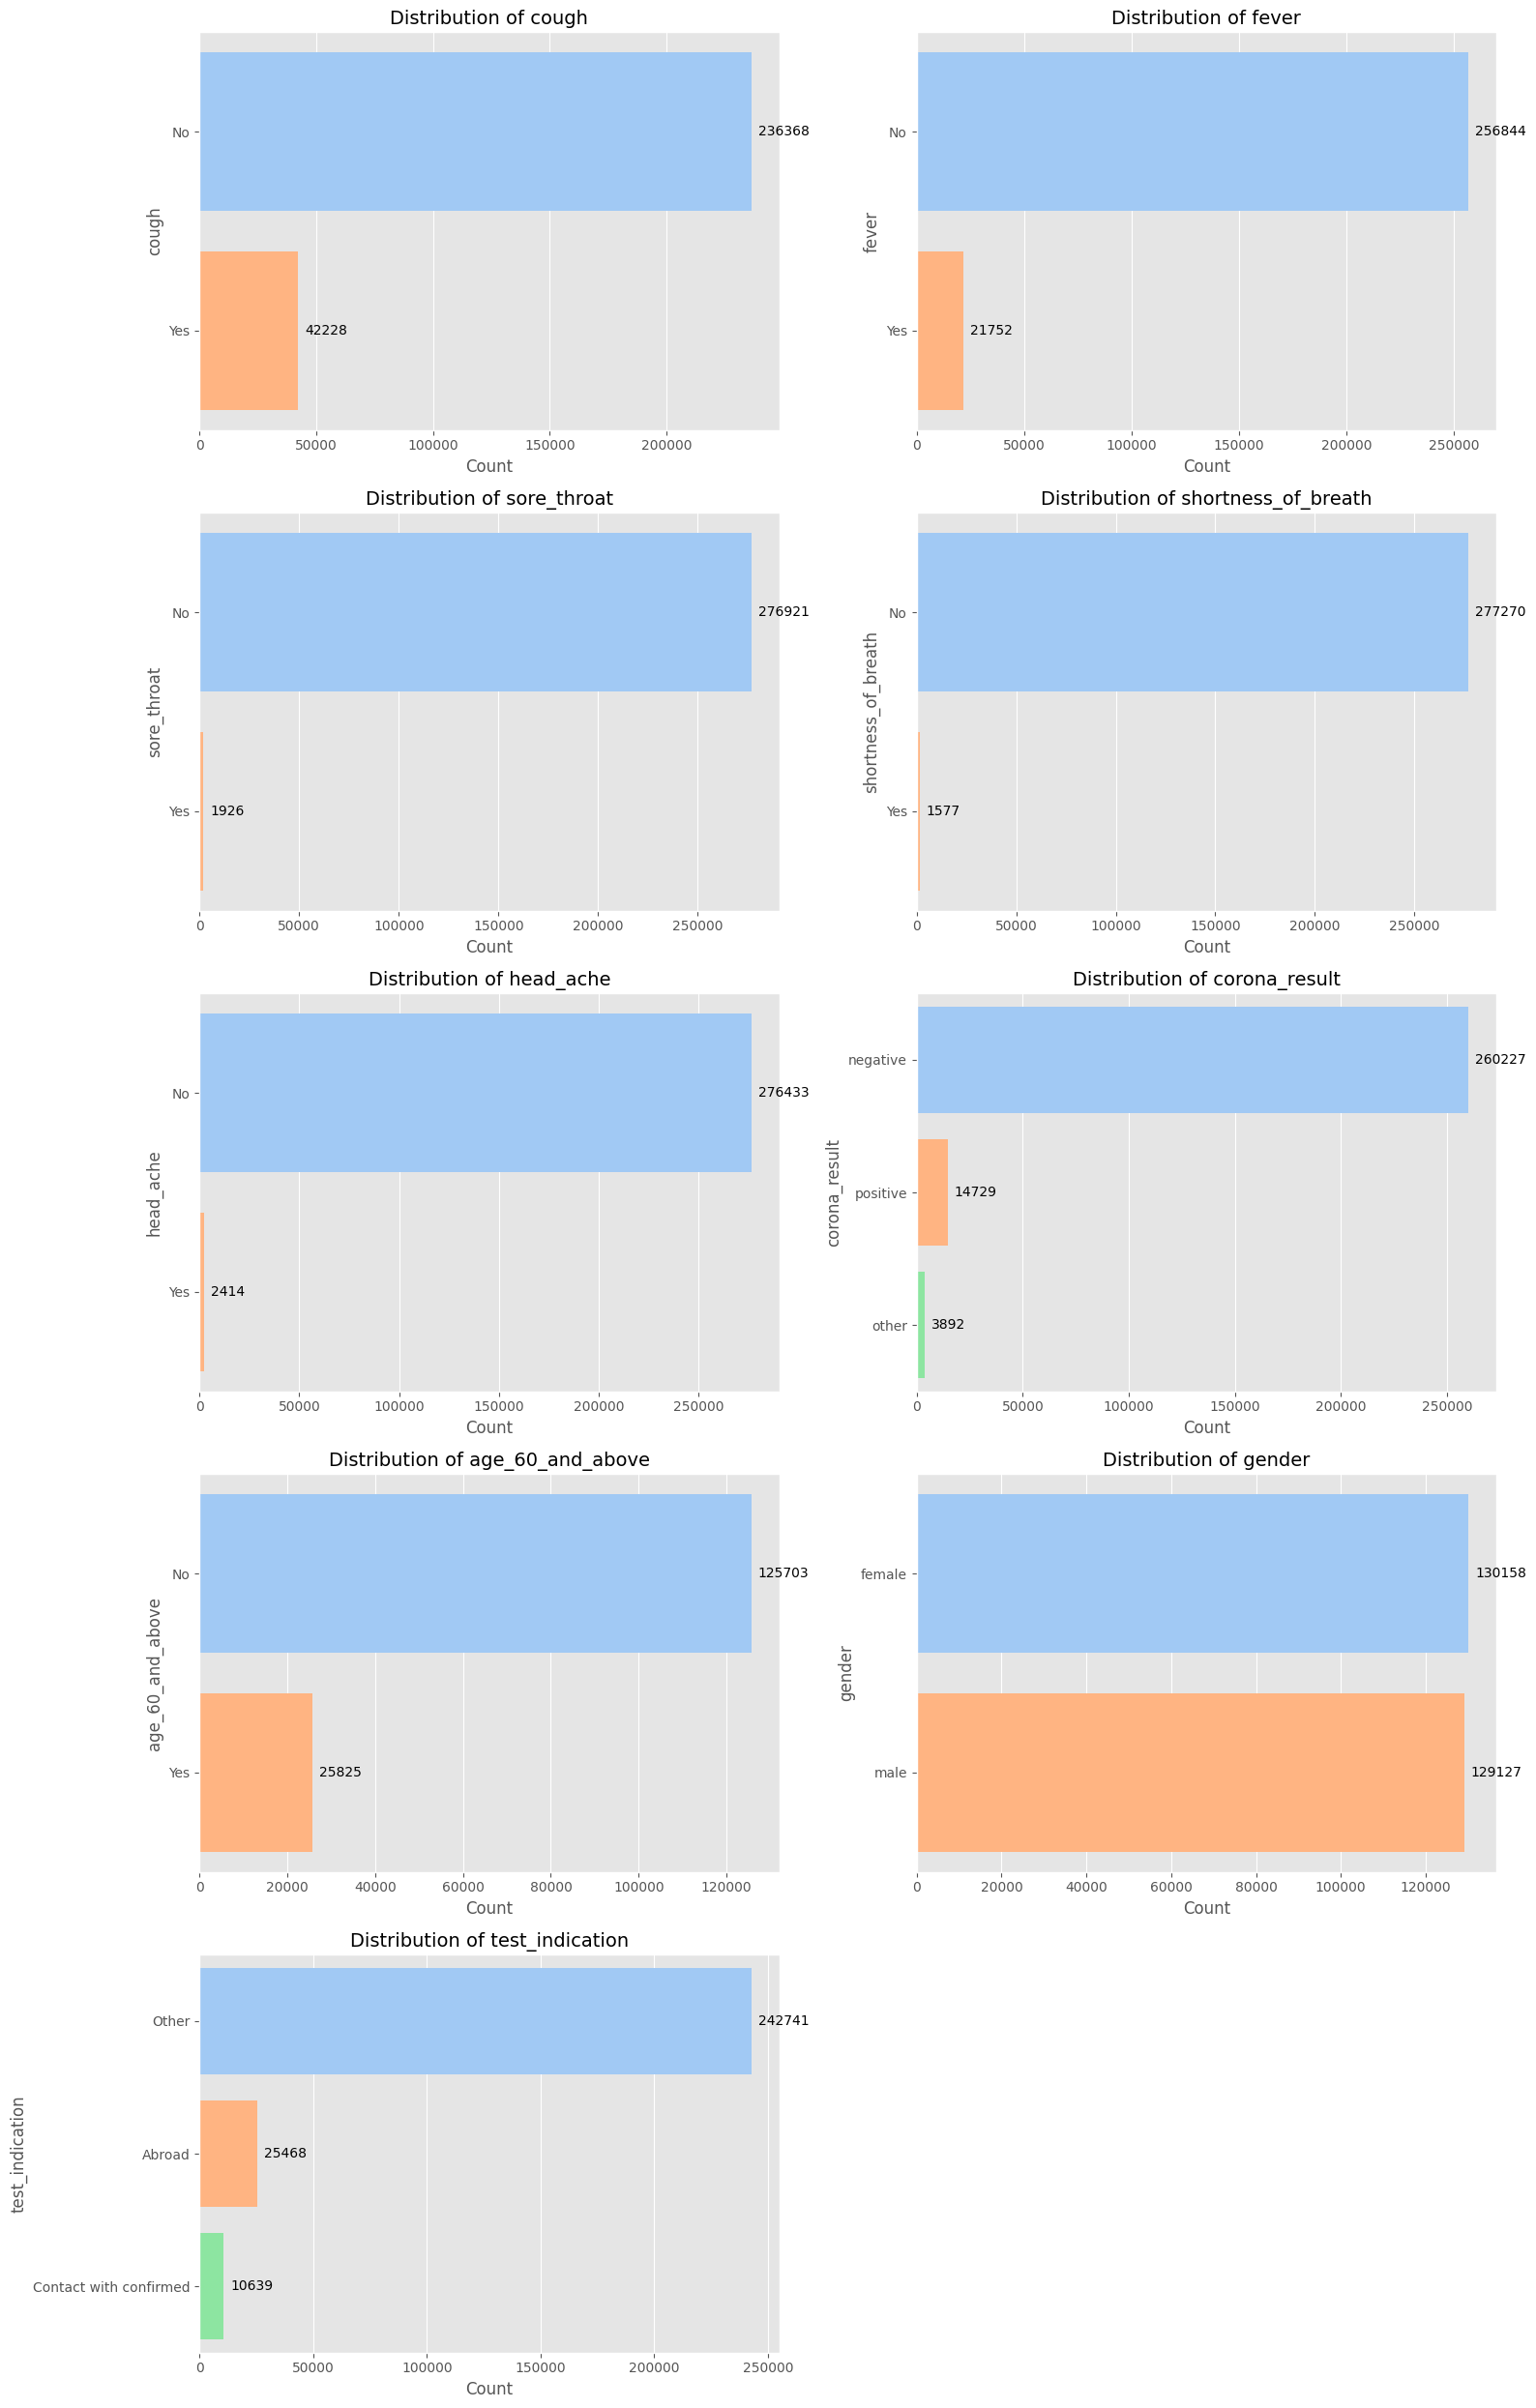

In [13]:
# Visualization of categorical columns

# Set the base color palette
palette_base = "pastel"

# Calculate the number of rows for subplots dynamically
num_cols = 2  # Number of columns for the grid layout
num_rows = (len(categorical_EDA) + num_cols - 1) // num_cols  # Round up to fit all variables

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over categorical columns and plot
for idx, (col, ax) in enumerate(zip(categorical_EDA, axes)):
    # Get unique categories and their counts
    unique_categories = data[col].value_counts().index
    num_categories = len(unique_categories)

    # Generate a custom color palette for the column
    colors = sns.color_palette(palette_base, n_colors=num_categories)
    color_mapping = dict(zip(unique_categories, colors))

    # Create the countplot
    sns.countplot(data=data, y=col, ax=ax, order=unique_categories)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_ylabel(col, fontsize=12)  # Set y-axis label
    ax.set_xlabel('Count', fontsize=12)  # Set x-axis label

    # Add custom colors to the bars
    for p, category in zip(ax.patches, unique_categories):
        p.set_facecolor(color_mapping[category])

    # Add annotations to the bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{int(width)}',
                    xy=(width, p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left', va='center', fontsize=10)

# Hide any unused subplots
for ax in axes[len(categorical_EDA):]:
    ax.axis("off")  # Turn off unused subplots

# Adjust layout and display
plt.tight_layout()
plt.show()

## **Data Preparation**

**Data Cleaning**

**Handling missing value**

In [14]:
# Missing values check
pd.DataFrame({
    'missing values': data.isnull().sum(),
    'percentage of missing values': data.isnull().sum() *100 / len(data)
})

,missing values,percentage of missing values
test_date,0,0.000000
cough,252,0.090372
fever,252,0.090372
sore_throat,1,0.000359
shortness_of_breath,1,0.000359
head_ache,1,0.000359
corona_result,0,0.000000
age_60_and_above,127320,45.659284
gender,19563,7.015650
test_indication,0,0.000000


**Reviewing missing values relationship between features**

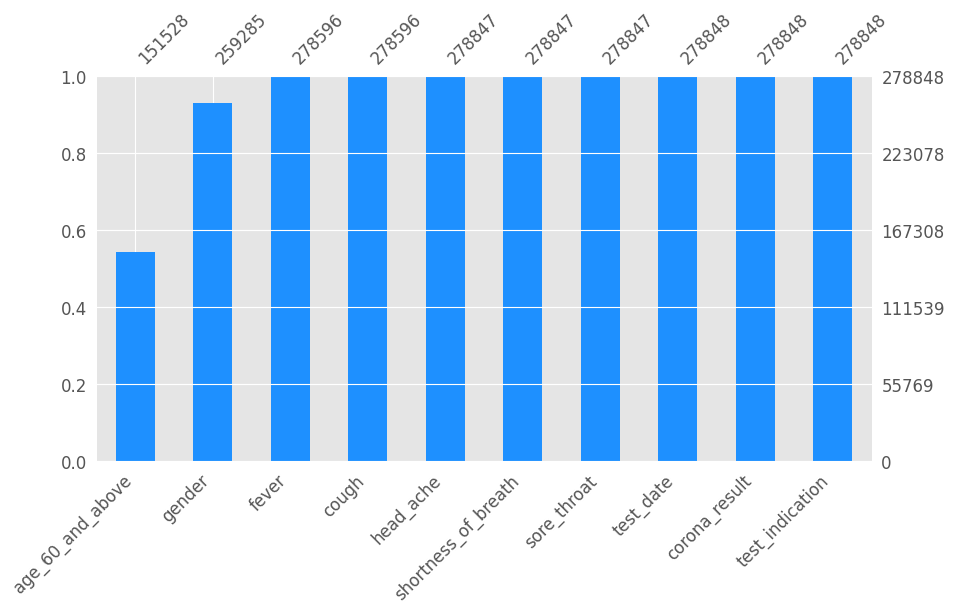

In [15]:
msno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

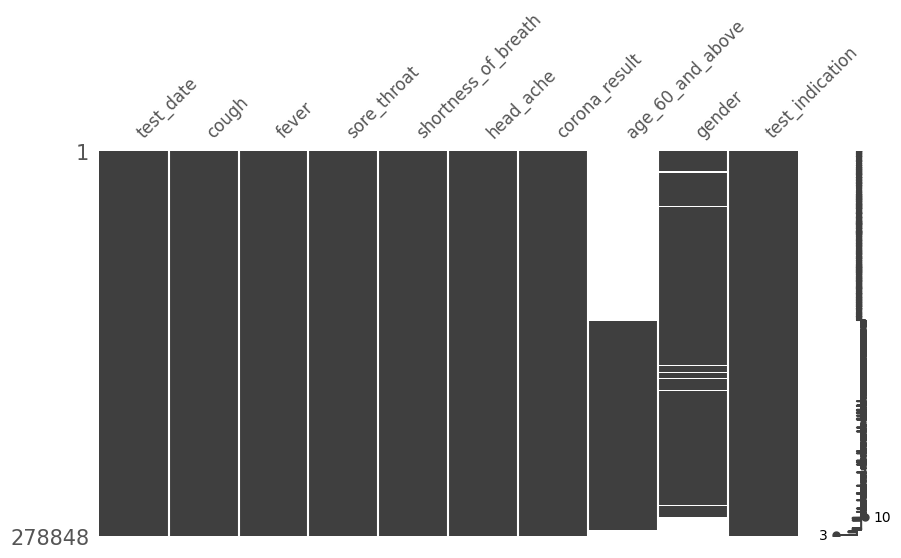

In [16]:
msno.matrix(data, figsize=(10,5), fontsize=12)
plt.show()

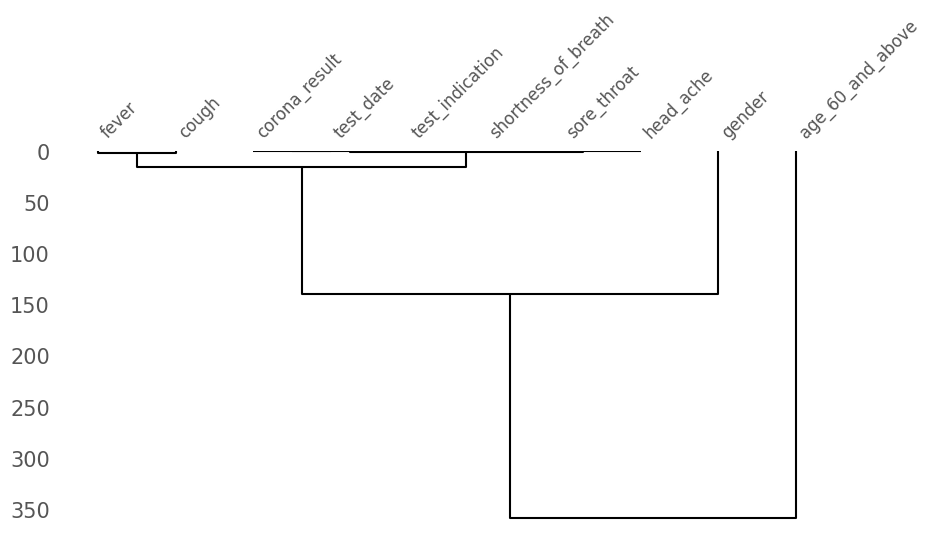

In [17]:
msno.dendrogram(data, figsize=(10,5), fontsize=12)
plt.show()

**Data Cleaning**

After knowing the number and percentage of missing values, We decide to handle the differently.


* We will drop columns of `test_date`, since this column do not contribute to prediction
* `Cough`, `fever`, `sore_throat`, `shortness_of_breath`, `head_ache` have very small percentage of missing values (less than 1%). We decided to drop them.
* `gender` column has ≈7% of missing values. We will impute them with a label like 'unknown'
* `age_60_and_above` contains more that 45.66% of missing values. This is very high. We will impute them with new label as `age60_missing`


**Dropping unnecessary columns and category**

In [18]:
# Deleting the 'test_date' column
data = data.drop(columns=["test_date"])

In [19]:
data.shape

(278848, 9)

In [20]:
# Deleting the category of 'other' in corona_result
data = data[data['corona_result'] != 'other']
data.shape

(274956, 9)

**Handling missing values**

In [21]:
# Drop missing values
# Missing values of these column below less than 1%
data = data.dropna(subset=['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache'])

In [22]:
# Impute `gender` column with `unknown
from sklearn.impute import SimpleImputer
symptom_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

# Transform the column and assign back
data['gender'] = symptom_imputer.fit_transform(data[['gender']])[:, 0]

In [23]:
# Impute `age_60_and_above` with `age_missing`
age_imputer = SimpleImputer(strategy='constant', fill_value='age_missing')
data['age_60_and_above'] = age_imputer.fit_transform(data[['age_60_and_above']])[:, 0]

In [24]:
# Missing values # sanity check
pd.DataFrame({
    'missing values': data.isnull().sum(),
    'percentage of missing values': data.isnull().sum() *100 / len(data)
})

,missing values,percentage of missing values
cough,0,0.0
fever,0,0.0
sore_throat,0,0.0
shortness_of_breath,0,0.0
head_ache,0,0.0
corona_result,0,0.0
age_60_and_above,0,0.0
gender,0,0.0
test_indication,0,0.0


In [25]:
data.dtypes.to_frame('data types')

,data types
cough,object
fever,object
sore_throat,object
shortness_of_breath,object
head_ache,object
corona_result,object
age_60_and_above,object
gender,object
test_indication,object


**Multicolinearity check**

In [26]:
# Defining variance inflation factors
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [27]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [28]:
vif_df # No Numerical

,Feature,VIF


In [29]:
dropped_columns

[]

**Cardinality**

In [30]:
# Checking cardinality

# creating a function to check cardinality
def check_cardinality(data):
    cardinality_info = []

    for feature in data.select_dtypes(include='object').columns:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Warning': warning})

    return pd.DataFrame(cardinality_info)

cardinality_data = check_cardinality(data)
cardinality_data

,Feature,Cardinality,Warning
0,cough,2,Low
1,fever,2,Low
2,sore_throat,2,Low
3,shortness_of_breath,2,Low
4,head_ache,2,Low
5,corona_result,2,Low
6,age_60_and_above,3,Low
7,gender,3,Low
8,test_indication,3,Low


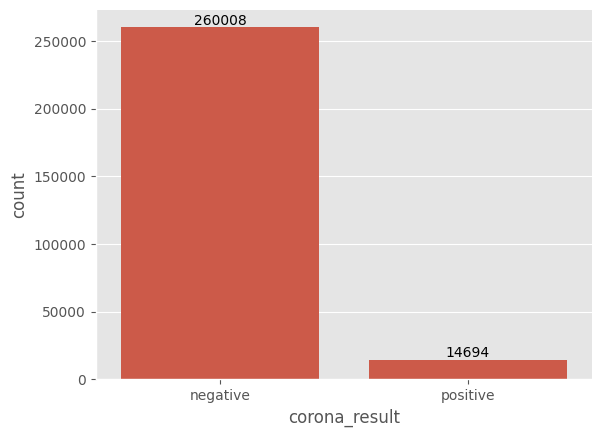

In [31]:
# imbalanced data check
ax = sns.countplot(data, x="corona_result")
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [32]:
# Imbalance data check
data["corona_result"].value_counts()

# Imbalance data check
data["corona_result"].value_counts(normalize=True)

,proportion
corona_result,
negative,0.946509
positive,0.053491


In [33]:
# Creating function for plotting categorical features
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'corona_result']).size().unstack().reset_index()
    agg_table['total'] = agg_table['positive']+agg_table['negative']
    agg_table['% positive'] = (agg_table['positive']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% positive', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% positive', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of getting sick by COVID19 by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='corona_result', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of patient getting sick by COVID19 according to {col}')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

In [34]:
data.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

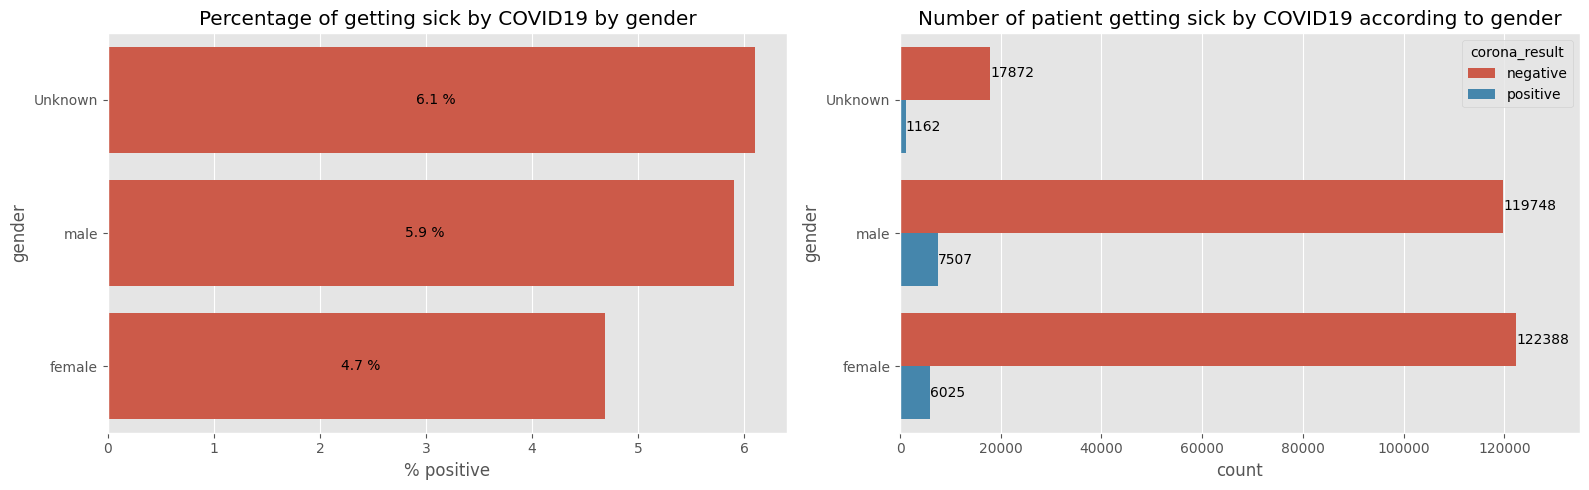

In [35]:
# Percentage and number of COVID19 positive result by 'gender'
create_plot(data, 'gender', x_maks=135000)

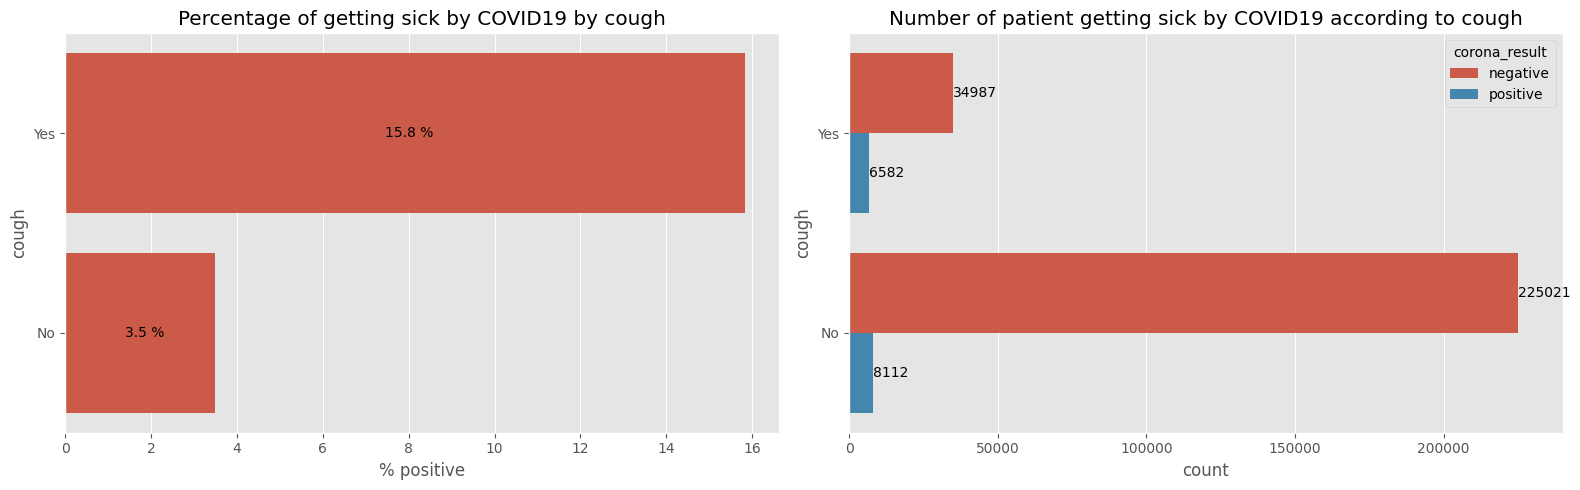

In [36]:
# Percentage and number of COVID19 positive result by 'cough'
create_plot(data, 'cough', x_maks=240000)

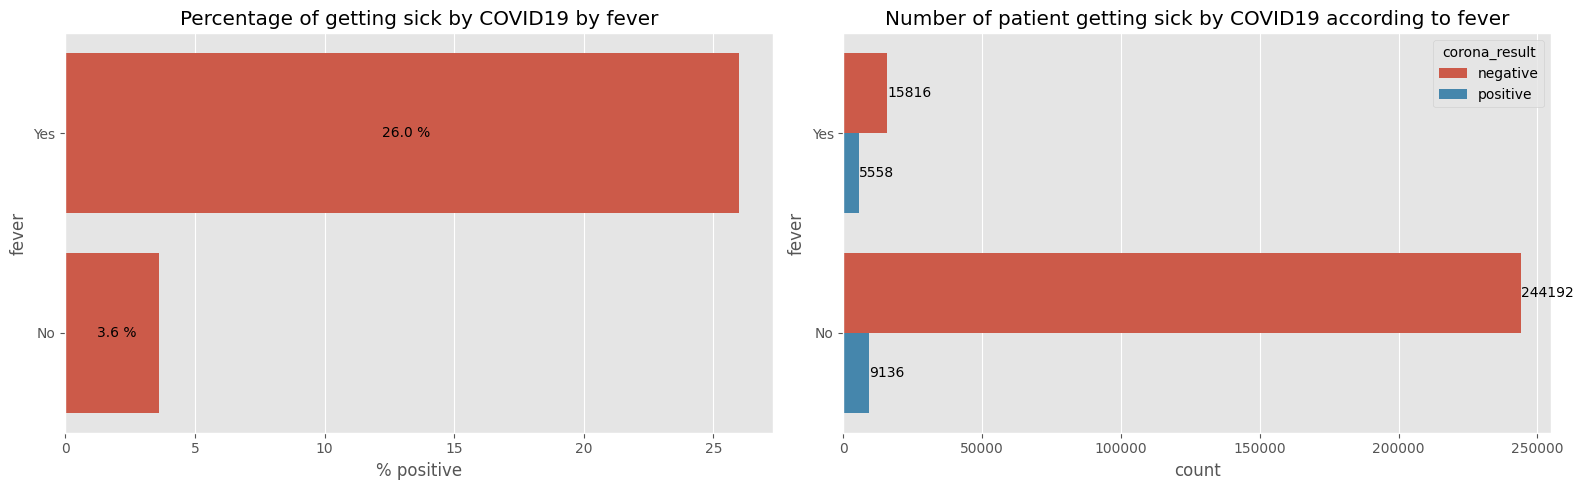

In [37]:
# Percentage and number of COVID19 positive result by 'fever'
create_plot(data, 'fever', x_maks=255000)

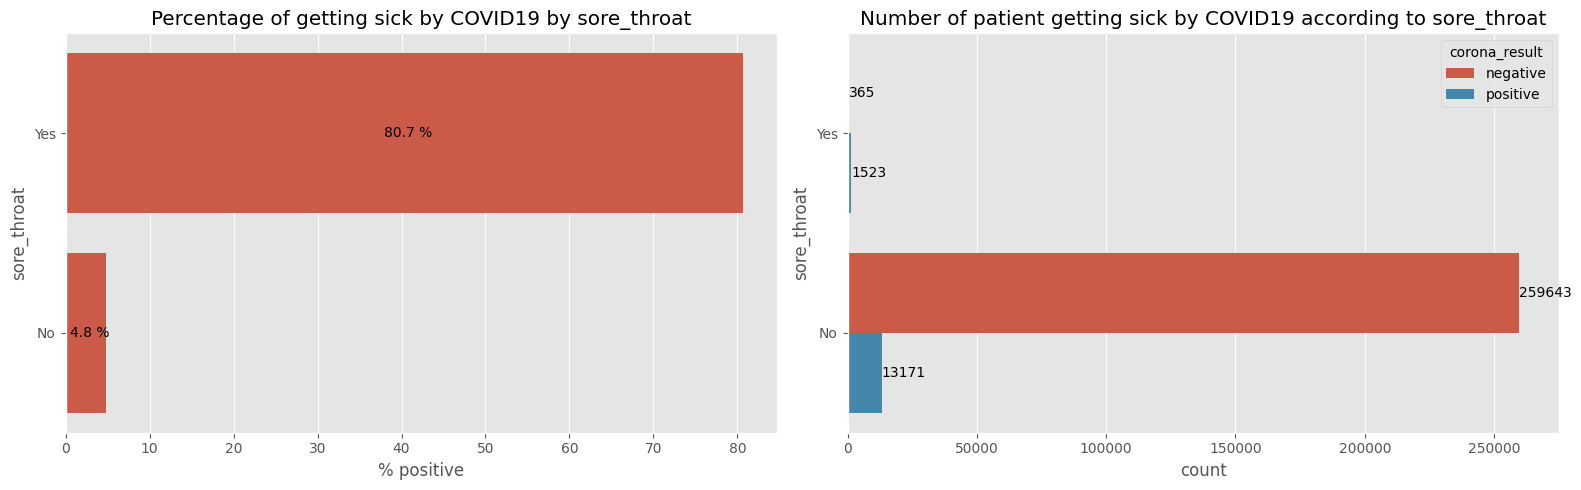

In [38]:
# Percentage and number of COVID19 positive result by 'sore_throat'
create_plot(data, 'sore_throat', x_maks=275000)

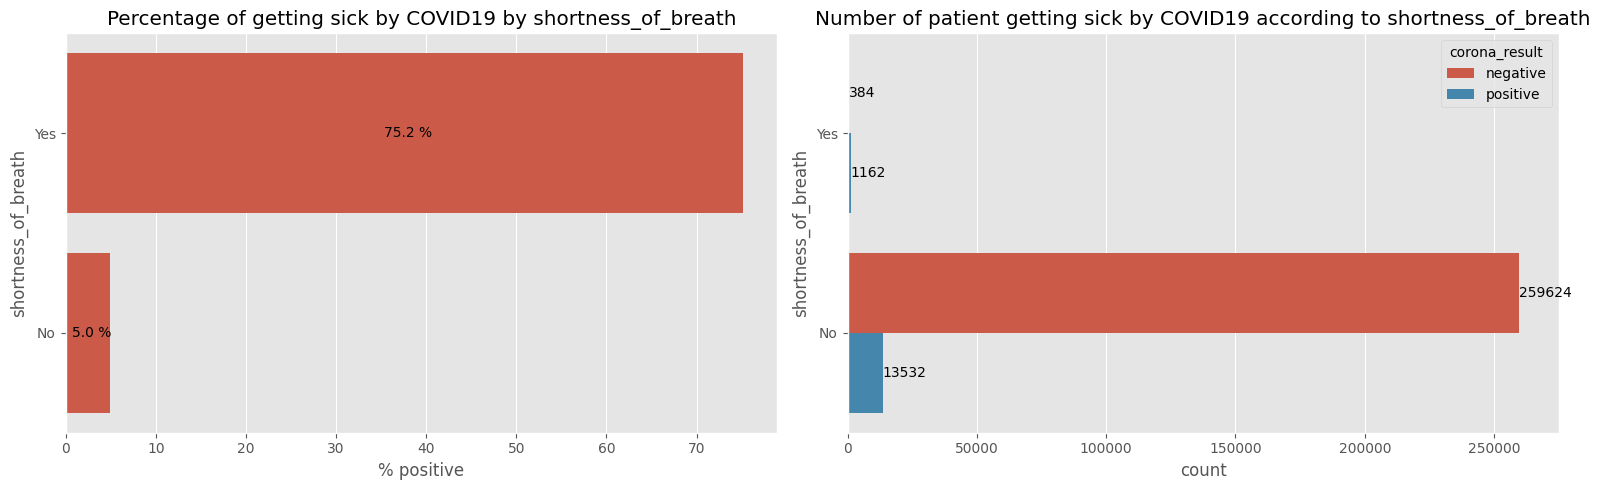

In [39]:
# Percentage and number of COVID19 positive result by 'shortness_of_breath'
create_plot(data, 'shortness_of_breath', x_maks=275000)

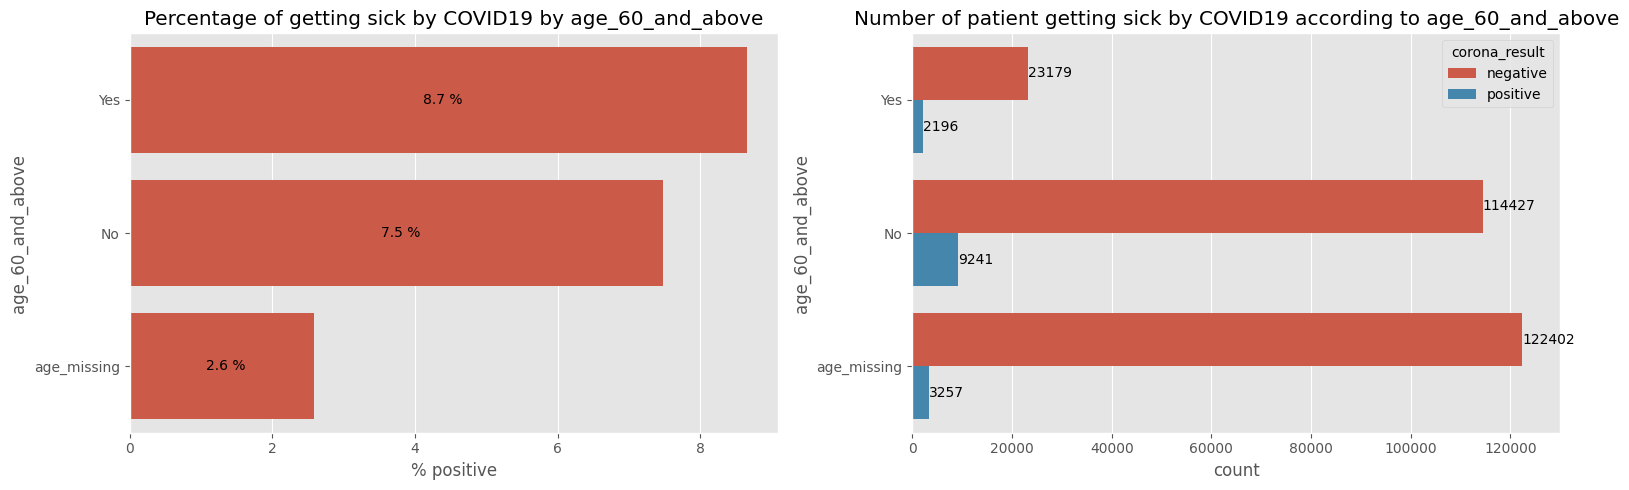

In [40]:
# Percentage and number of COVID19 positive result by 'age_60_and_above'
create_plot(data, 'age_60_and_above', x_maks=130000)

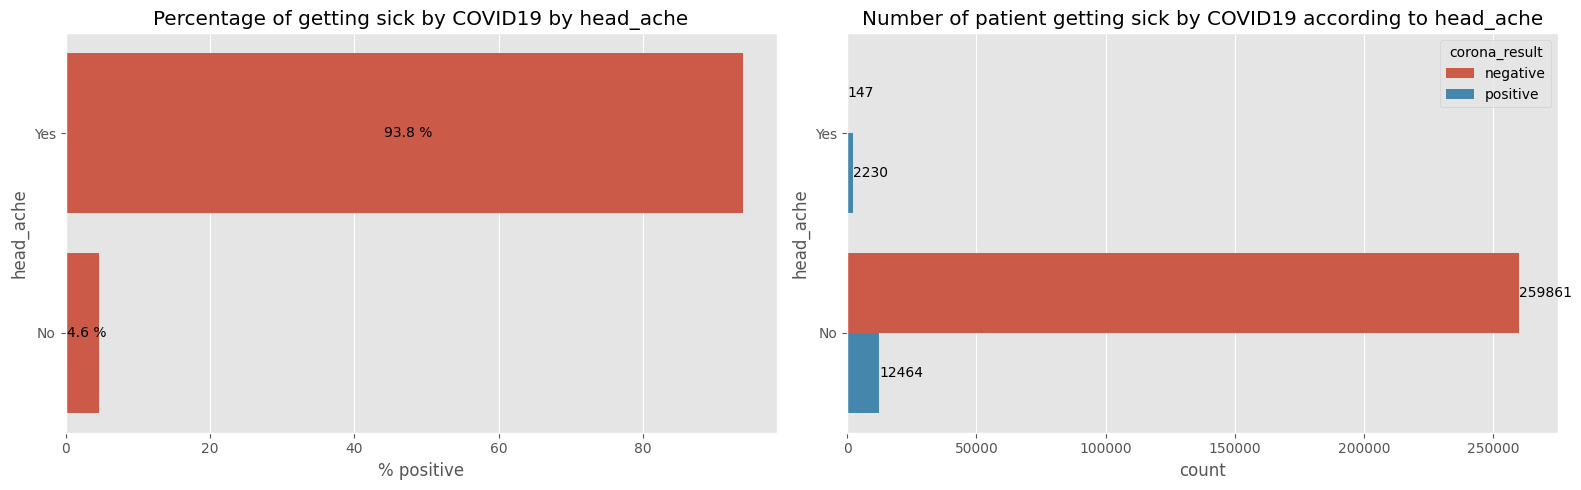

In [41]:
# Percentage and number of COVID19 positive result by 'head_ache'
create_plot(data, 'head_ache', x_maks=275000)

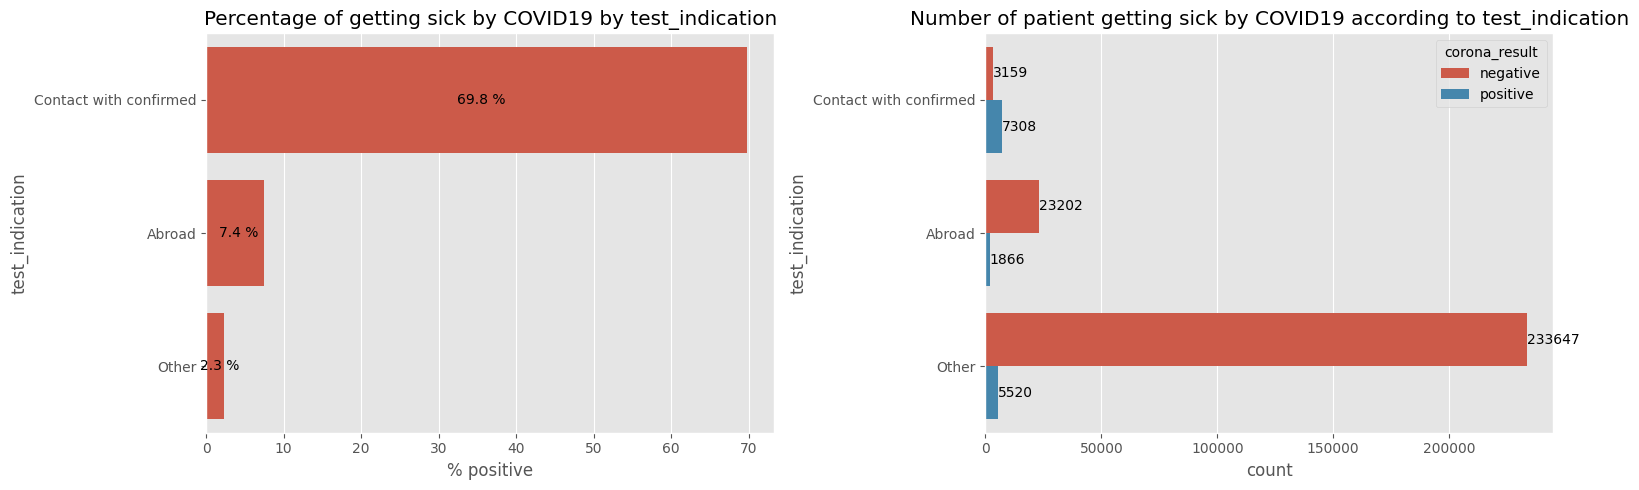

In [42]:
# Percentage and number of COVID19 positive result by 'test_indication'
create_plot(data, 'test_indication', x_maks=245000)

## **Data Analysis**

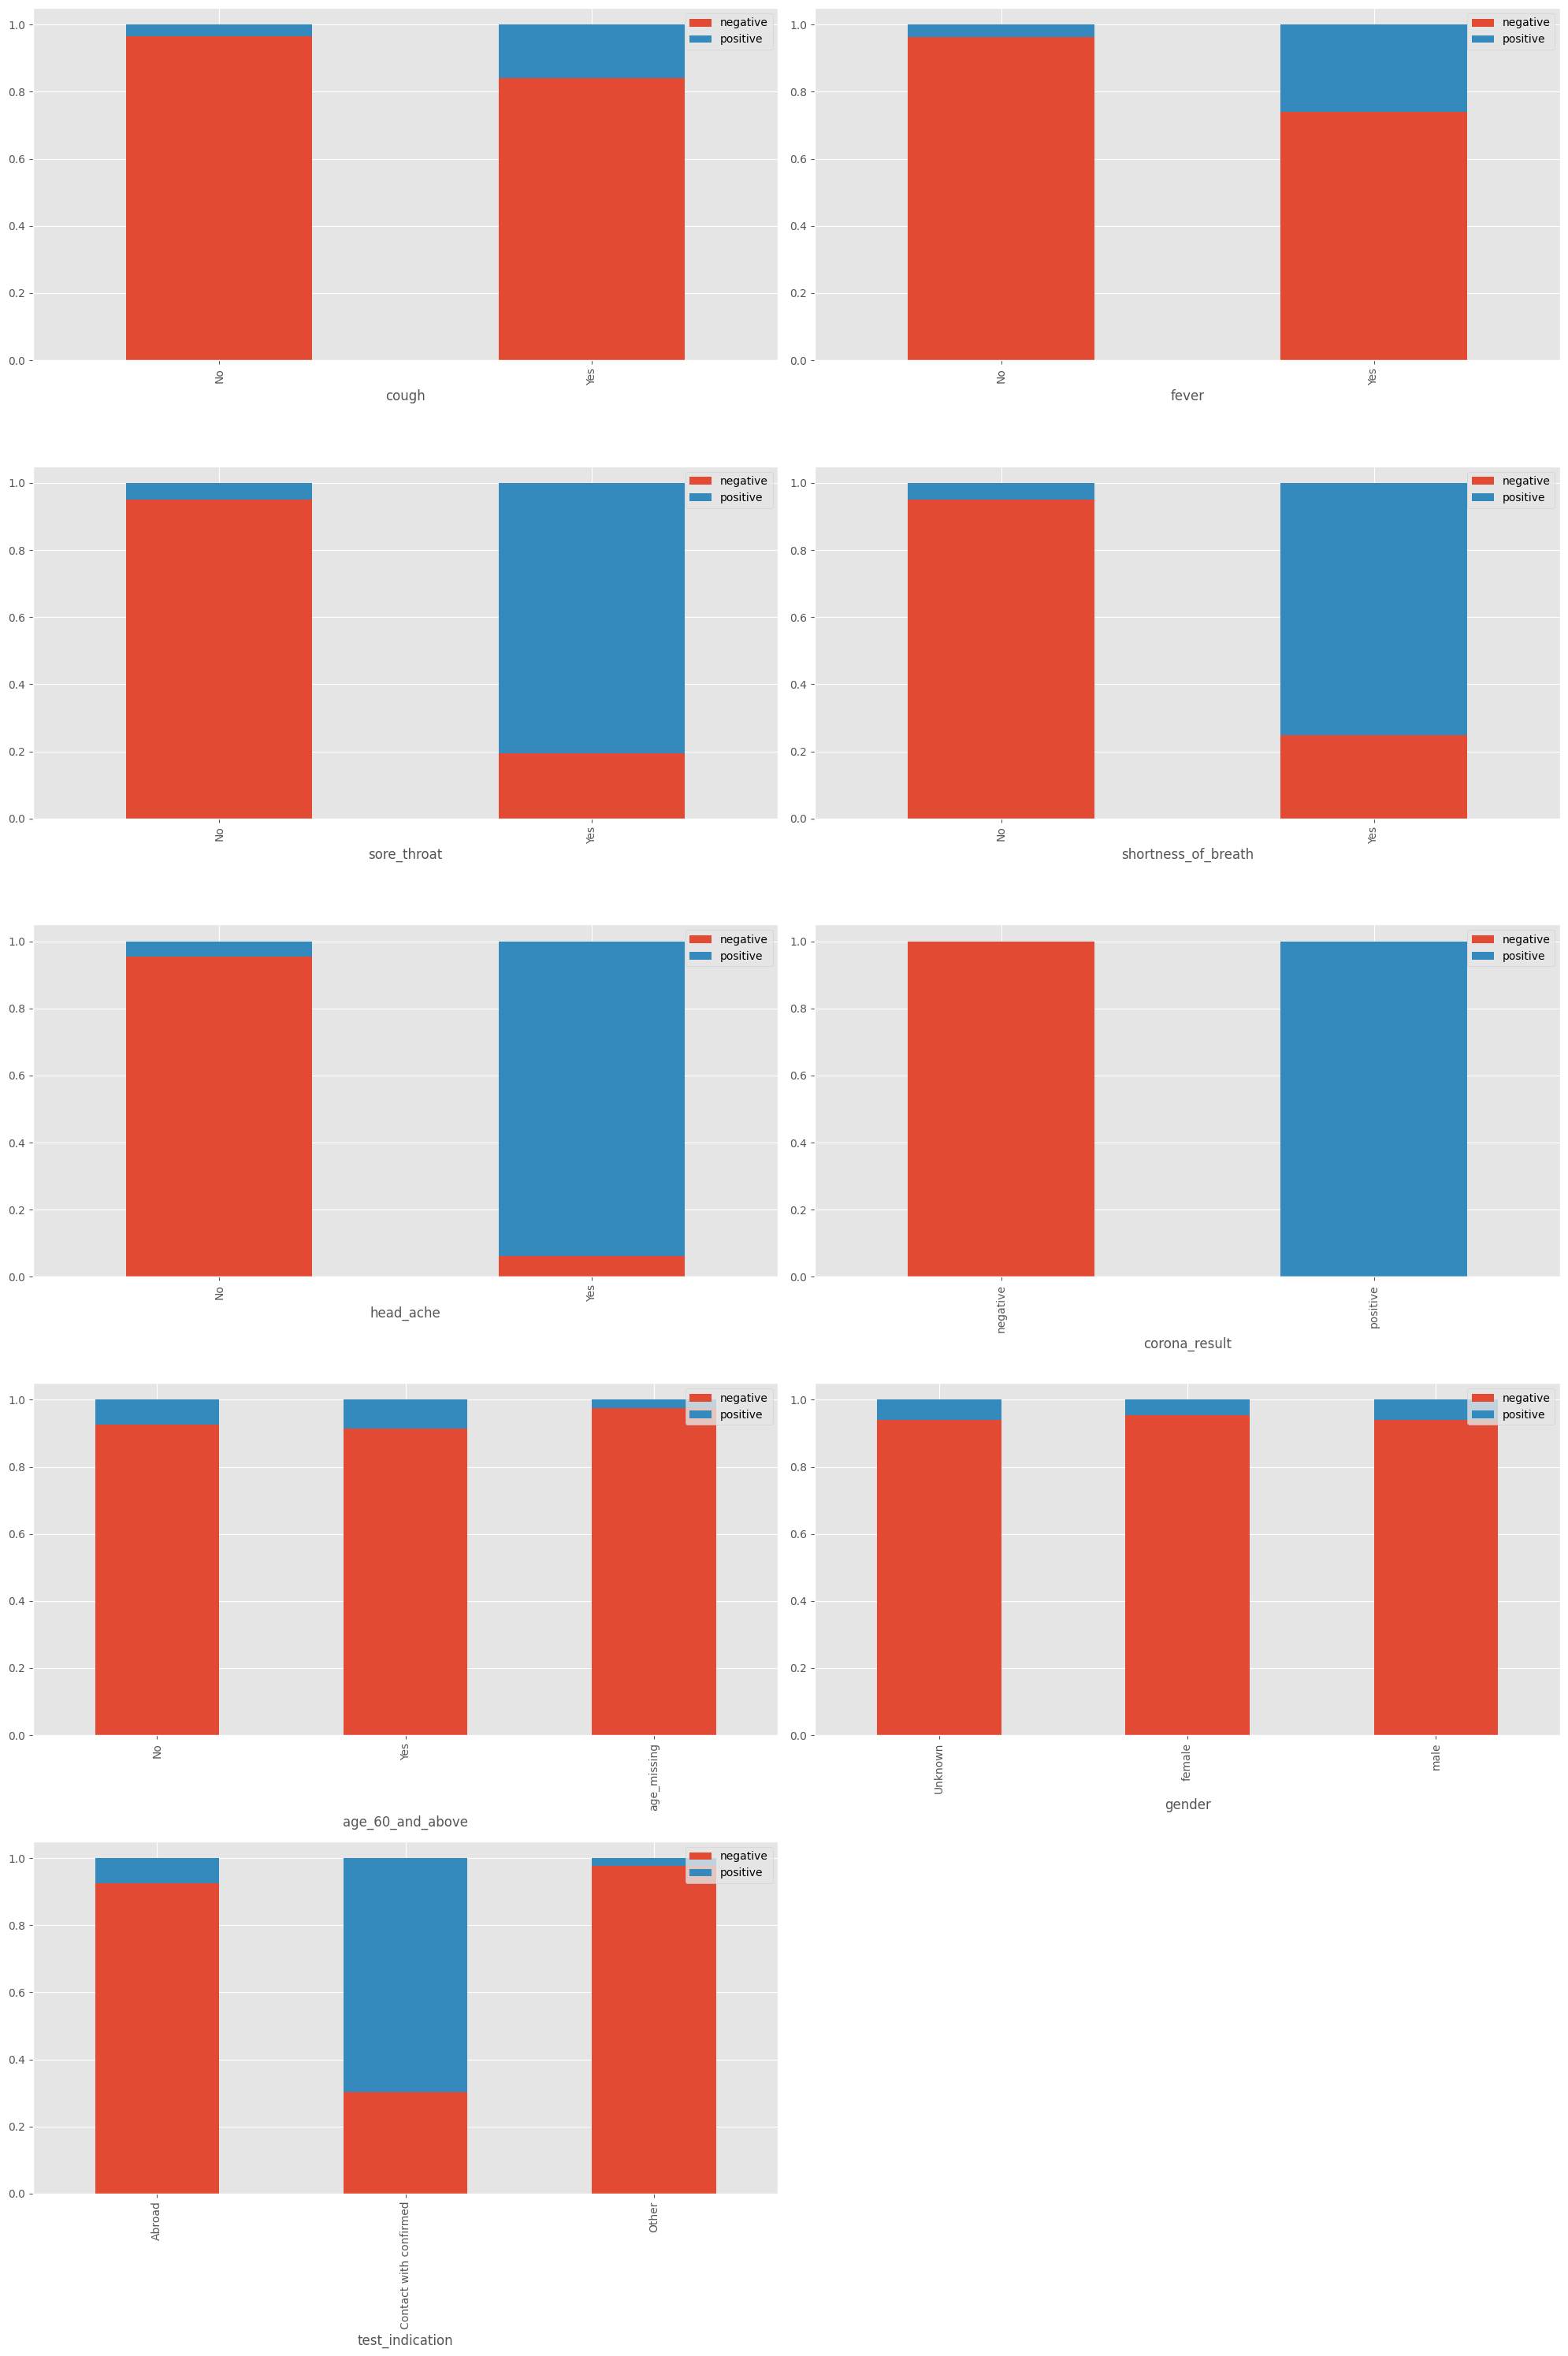

In [43]:
# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,30))

for i in data.columns:
    count += 1
    ax = plt.subplot(5, 2, count)
    pd.crosstab(data[i], data['corona_result'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [44]:
# Percentage of features vs target
# Table of categorical feature vs target (class)
for col in data.drop(columns=['corona_result']).columns:
    # Get the count of each class per categorical feature
    count_data = data.groupby([col, 'corona_result']).size().unstack(fill_value=0)

    # Normalize the counts to get proportions
    normalized_data = round((count_data.div(count_data.sum(axis=1), axis=0)),3)

    # Display the sorted values
    display(normalized_data.sort_values(by=['positive'], ascending=False))

corona_result,negative,positive
cough,,
Yes,0.842,0.158
No,0.965,0.035


corona_result,negative,positive
fever,,
Yes,0.740,0.260
No,0.964,0.036


corona_result,negative,positive
sore_throat,,
Yes,0.193,0.807
No,0.952,0.048


corona_result,negative,positive
shortness_of_breath,,
Yes,0.248,0.752
No,0.950,0.050


corona_result,negative,positive
head_ache,,
Yes,0.062,0.938
No,0.954,0.046


corona_result,negative,positive
age_60_and_above,,
Yes,0.913,0.087
No,0.925,0.075
age_missing,0.974,0.026


corona_result,negative,positive
gender,,
Unknown,0.939,0.061
male,0.941,0.059
female,0.953,0.047


corona_result,negative,positive
test_indication,,
Contact with confirmed,0.302,0.698
Abroad,0.926,0.074
Other,0.977,0.023


**Key insight**

In general, We divide the present features into 3 distinct categories such as symptoms, demographics, and testing context. The insights from features can be seen below

**Cough**

* Positive rate higher when Yes (15.8%) vs No (3.5%) → Useful predictor.

**Fever**

* Positive rate rises from 3.6% (No) to 26% (Yes) → useful predictor.

**Sore throat**

* Very strong indicator: 80.7% positive when present → Very important predictor.

**Shortness of breath**

* High association: 75.2% positive when present → Very important predictor.

**Headache**

* Extremely predictive: 93.8% positive when present → Top feature.

**Age ≥60**

* Older age is slightly higher positive rate (8.6%) than younger (7.5%) → Weak predictor.

**Gender**

* All groups (male, female, and others) have similar positive rates (~5–6%) → Not predictive.

**Test indication**

* Contact with confirmed case: very high risk (69.8% positive), while Abroad travel (7.4%) and Other reasons (2.3%). Contact with confirmed COVID19  →  Very important predictor.


**Take aways**
* Symptom presence (Headache (94%), sore throat (81%), and shortness of breath (75%)) are the strongest signal for a positive test
* Fever (26%) and cough (16%) also increase likelihood of positivity but less strong.
* Demographic feature like age and gender have weaker effect or less predictive features.
* Testing context (test indication) can be considered as a strong predictive feature too.

## **Model Building**

**Replacing values**

In [45]:
data['corona_result'] = np.where(data['corona_result']=='positive',1,0)

**Define features and target**

In [46]:
# define features and target
X = data.drop(columns=['corona_result'])
y = data['corona_result']

In [47]:
X.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

**Data splitting**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

**Feature engineering**

In [49]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication']),
], remainder='passthrough')

**Scaling**

In [50]:
# Scaling
# maxabscaler # Handling sparse data
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

**Resamplers - Handling imbalance**

In [51]:
# Defining SMOTE
smote = SMOTE(random_state=0)
# Defining SMOTENC
smotenc = SMOTENC(random_state=0, categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8]) #

**Pipeline**

In [52]:
# Pipeline
Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('resamplers', smotenc)
])

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['cough', 'fever',
                                                   'sore_throat',
                                                   'shortness_of_breath',
                                                   'head_ache',
                                                   'age_60_and_above', 'gender',
                                                   'test_indication'])])),
                ('scaler', MaxAbsScaler()),
                ('resamplers',
                 SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                         random_state=0))])

**Cross validation**

In [53]:
# Cross validation
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

**Model benchmarking**

In [54]:
# Machine Learning/Algorithmic models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
#cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [56]:
from sklearn.base import clone
from tqdm import tqdm


In [61]:
# Recall # Model training

# 9 Models selection
models = {
    "logreg": logreg,
    "knn": knn,
    "dtree": dtree,
    "rf": rf,
    "ada": ada,
    "grad": grad,
    "xgb": xgb,
    "lgbm": lgbm
}


# models that need scaling
needs_scaling = ["logreg", "knn"]

# storage for results
recall_mean_with_smotenc = []
recall_std_with_smotenc = []

for name, model in tqdm(models.items(), desc="Running models", unit="model"):

    # -------------------
    # Pipeline with SMOTENC
    # -------------------
    steps = [('prep', transformer)]
    if name in needs_scaling:
        steps.append(('scaler', scaler))
    steps.append(('resample', smotenc))
    steps.append(('algo', clone(model)))
    pipe_model_with_smotenc = Pipeline(steps)

    model_cv_with_smotenc = cross_val_score(
        estimator=pipe_model_with_smotenc,
        X=X_train,
        y=y_train,
        cv=skf,
        scoring='recall',
        n_jobs=-1
    )
    mean_smotenc = model_cv_with_smotenc.mean()
    std_smotenc = model_cv_with_smotenc.std()
    recall_mean_with_smotenc.append(mean_smotenc)
    recall_std_with_smotenc.append(std_smotenc)

    tqdm.write(f"[{name}] → Recall: {mean_smotenc:.4f} ± {std_smotenc:.4f}")



Running models:  12%|█▎        | 1/8 [02:23<16:44, 143.52s/model]

[logreg] → Recall: 0.7530 ± 0.0077


Running models:  25%|██▌       | 2/8 [41:51<2:25:11, 1451.96s/model]

[knn] → Recall: 0.7834 ± 0.0178


Running models:  38%|███▊      | 3/8 [44:32<1:11:51, 862.37s/model] 

[dtree] → Recall: 0.7932 ± 0.0046


Running models:  50%|█████     | 4/8 [50:13<43:46, 656.72s/model]  

[rf] → Recall: 0.7957 ± 0.0045


Running models:  62%|██████▎   | 5/8 [53:00<24:00, 480.09s/model]

[ada] → Recall: 0.7589 ± 0.0058


Running models:  75%|███████▌  | 6/8 [56:14<12:45, 382.89s/model]

[grad] → Recall: 0.7935 ± 0.0091


Running models:  88%|████████▊ | 7/8 [58:49<05:08, 308.43s/model]

[xgb] → Recall: 0.7973 ± 0.0047


Running models: 100%|██████████| 8/8 [1:01:30<00:00, 461.29s/model]

[lgbm] → Recall: 0.7974 ± 0.0040


In [62]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost', 'LightGBM'],
    'recall_mean_with_smotenc' : recall_mean_with_smotenc,
    'recall_std_with_smotenc' : recall_std_with_smotenc,
}).sort_values('recall_mean_with_smotenc', ascending=False)

,model,recall_mean_with_smotenc,recall_std_with_smotenc
7,LightGBM,0.797448,0.004039
6,XGBoost,0.797278,0.004695
3,Random Forest,0.795746,0.004513
5,GradienBoost,0.793535,0.009101
2,Decision Tree,0.793194,0.004553
1,KNN,0.783411,0.017782
4,AdaBoost,0.758911,0.005828
0,Logistic Regression,0.752956,0.007677


In [66]:
# Predicting to test data


# 9 Models selection
models = {
    "logreg": logreg,
    "knn": knn,
    "dtree": dtree,
    "rf": rf,
    "ada": ada,
    "grad": grad,
    "xgb": xgb,
    "lgbm": lgbm
}

# models that need scaling
needs_scaling = ["logreg", "knn"]

# storage for results
mean_recall_test = []
roc_auc_scores = []

# Find the best model

for name, model in tqdm(models.items(), desc="Running models", unit="model"):


    # -------------------
    # Pipeline (with SMOTENC)
    # -------------------
    steps = [('prep', transformer)]
    if name in needs_scaling:
        steps.append(('scaler', scaler))
    steps.append(('resample', smotenc))
    steps.append(('algo', clone(model)))
    model_pipe = Pipeline(steps)

    # fit the model
    model_pipe.fit(X_train, y_train)

    # predict on test set
    y_pred = model_pipe.predict(X_test)
    y_pred_proba = model_pipe.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # evaluate recall
    score = recall_score(y_test, y_pred)
    mean_recall_test.append(score)

    # evaluate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)

    #tqdm.write(f"[{name}] → Recall: {mean_recall_test:.4f} | ROC AUC: {roc_auc_scores:.4f}")
    tqdm.write(f"[{name}] → Recall: {score:.4f} | ROC AUC: {roc_auc:.4f}")


Running models:  12%|█▎        | 1/8 [00:50<05:53, 50.47s/model]

[logreg] → Recall: 0.7400 | ROC AUC: 0.8925


Running models:  25%|██▌       | 2/8 [29:27<1:43:04, 1030.72s/model]

[knn] → Recall: 0.7907 | ROC AUC: 0.8679


Running models:  38%|███▊      | 3/8 [30:05<48:07, 577.53s/model]   

[dtree] → Recall: 0.7880 | ROC AUC: 0.9009


Running models:  50%|█████     | 4/8 [31:36<25:42, 385.50s/model]

[rf] → Recall: 0.7894 | ROC AUC: 0.9025


Running models:  62%|██████▎   | 5/8 [32:18<13:04, 261.63s/model]

[ada] → Recall: 0.7486 | ROC AUC: 0.8869


Running models:  75%|███████▌  | 6/8 [33:10<06:20, 190.30s/model]

[grad] → Recall: 0.7792 | ROC AUC: 0.9012


Running models:  88%|████████▊ | 7/8 [33:52<02:21, 141.88s/model]

[xgb] → Recall: 0.7904 | ROC AUC: 0.9024
[LightGBM] [Info] Number of positive: 208006, number of negative: 208006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 416012, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Running models: 100%|██████████| 8/8 [34:36<00:00, 259.51s/model]

[lgbm] → Recall: 0.7897 | ROC AUC: 0.9033


In [64]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost', 'LightGBM'],
    'Mean recall - training set': recall_mean_with_smotenc, #smotenc
    'Mean recall - testing set': mean_recall_test,
    'ROC AUC score': roc_auc_scores
}).sort_values('Mean recall - testing set', ascending=False)

,model,Mean recall - training set,Mean recall - testing set,ROC AUC score
1,KNN,0.783411,0.790745,0.867945
6,XGBoost,0.797278,0.790405,0.902420
7,LightGBM,0.797448,0.789724,0.903282
3,Random Forest,0.795746,0.789384,0.902509
2,Decision Tree,0.793194,0.788023,0.900913
5,GradienBoost,0.793535,0.779177,0.901165
4,AdaBoost,0.758911,0.748554,0.886853
0,Logistic Regression,0.752956,0.740048,0.892469


### **Hyperparameter tunning**

**XGBoost**

In [57]:
# Hyperparameter tuning Xgboost

# Preprocessing
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication']),
], remainder='passthrough')
smotenc = SMOTENC(random_state=0, categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8]) # SMOTE for balancing
xgb = XGBClassifier(random_state=0)  # XGBoost classifier


# Defining pipeline
estimator_xgboost = Pipeline([
    ('prep', transformer),
    ('resamplers', smotenc),
    ('model', xgb)
])

# Adjusted hyperparameter space
hyperparam_space_xgboost = [{
    'model__max_depth': [3, 5, 7, 9],  # Expanding search space
    'model__learning_rate': [0.1, 0.05, 0.01, 0.001],  # Including smaller learning rates
    'model__n_estimators': [100, 150, 200, 250],  # Higher n_estimators for lower learning rates
    'model__subsample': [0.8, 0.9, 1.0],  # Exploring subsample rates
    'model__colsample_bytree': [0.8, 0.9, 1.0],  # Exploring column sampling
    'model__gamma': [0, 0.1, 0.2, 0.5],  # Adding gamma for regularization
    'model__min_child_weight': [1, 2, 3, 4],  # Adding min_child_weight
}]

# Hyperparameter tuning using RandomizedSearchCV
tuned_xgboost = RandomizedSearchCV(
    estimator_xgboost,
    n_jobs=-1,
    param_distributions=hyperparam_space_xgboost,
    scoring='recall',
    n_iter=50,
    cv=5,  # Cross-validation folds
    random_state=0,
)

# Fitting the tuned model
tuned_xgboost.fit(X_train, y_train)

# Best recall score on training set
print(f'Recall score - training set: {tuned_xgboost.best_score_:.3f}')
print(f'Best parameters: {tuned_xgboost.best_params_}')

Recall score - training set: 0.815
Best parameters: {'model__subsample': 0.8, 'model__n_estimators': 250, 'model__min_child_weight': 2, 'model__max_depth': 5, 'model__learning_rate': 0.001, 'model__gamma': 0.5, 'model__colsample_bytree': 0.9}


In [58]:
# Model after hyperparameter tuning
tuned_model_xgboost = tuned_xgboost.best_estimator_

# Fitting model
tuned_model_xgboost.fit(X_train, y_train)

# predict on test set
y_pred_xgboost = tuned_model_xgboost.predict(X_test)
y_pred_proba_xgboost =tuned_model_xgboost.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


# Evaluate recall score on test set
test_recall = recall_score(y_test, y_pred_xgboost)
print(f'Test Accuracy: {test_recall:.3f}')

Test Accuracy: 0.805


In [1]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost', 'LightGBM'],
    'Mean recall - training set': recall_mean_with_smotenc, #smotenc
    'Mean recall - testing set': mean_recall_test,
    'ROC AUC score': roc_auc_scores
}).sort_values('Mean recall - testing set', ascending=False)

NameError: name 'pd' is not defined

In [65]:
zzzz

NameError: name 'zzzz' is not defined

In [ ]:
# recall
# Comparing resampling between SMOTENC and SMOTE

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

recall_mean_with_smote = []
recall_std_with_smote = []
recall_mean_with_smotenc = []
recall_std_with_smotenc = []

for model in  models :

    # modeling with resampling - smote
    pipe_model_with_smote = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algo', model)
    ])

    model_cv_with_smote = cross_val_score(
        estimator = pipe_model_with_smote,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    recall_mean_with_smote.append(model_cv_with_smote.mean())
    recall_std_with_smote.append(model_cv_with_smote.std())

    # modeling with resampling - SMOTENC

    pipe_model_with_smotenc = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smotenc),
        ('algo', model)
    ])

    model_cv_with_smotenc = cross_val_score(
        estimator = pipe_model_with_smotenc,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    recall_mean_with_smotenc.append(model_cv_with_smotenc.mean())
    recall_std_with_smotenc.append(model_cv_with_smotenc.std())

In [ ]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'recall_mean_with_smotenc' : recall_mean_with_smotenc,
    'recall_mean_with_smote' : recall_mean_with_smote,
    'recall_std_with_smotenc' : recall_std_with_smotenc,
    'recall_std_with_smote' : recall_std_with_smote,
}).sort_values('recall_mean_with_smote', ascending=False)

In [ ]:
# Predicting to test data

mean_recall_test = []

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

# Find the best model
for algoritma in models :
    model_pipe = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smotenc),
        ('algo', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = recall_score(y_test, y_pred)
    mean_recall_test.append(score)

In [ ]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean recall train': recall_mean_with_smotenc, #smote
    'mean recall test': mean_recall_test
}).sort_values('mean recall test', ascending=False)

In [ ]:
ccccc

## **Model evaluation**

## **Conclusion**

### **Conclusion and Insights**

### **Recommendations**

## **coretan**

In [ ]:
df = data.copy()

In [ ]:
# Create missingness indicators
df['gender_missing'] = df['gender'].isna().astype(int)
df['age60_missing'] = df['age_60_and_above'].isna().astype(int)


In [ ]:
# Compare missingness groups against the target

# Compare corona_result rates for gender missing vs not missing
print(df.groupby('gender_missing')['corona_result'].value_counts(normalize=True))

# Compare corona_result rates for age_60_and_above missing vs not missing
print(df.groupby('age60_missing')['corona_result'].value_counts(normalize=True))


In [ ]:
# Chi-square statistical test (optional, to confirm significance)
import scipy.stats as stats

# Gender missing vs corona_result
contingency_gender = pd.crosstab(df['gender_missing'], df['corona_result'])
chi2_gender, p_gender, _, _ = stats.chi2_contingency(contingency_gender)

# Age missing vs corona_result
contingency_age = pd.crosstab(df['age60_missing'], df['corona_result'])
chi2_age, p_age, _, _ = stats.chi2_contingency(contingency_age)

print(f"Gender missingness vs corona_result: p={p_gender}")
print(f"Age missingness vs corona_result: p={p_age}")


If p < 0.05, missingness is statistically associated with the corona_result outcome.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportion of positive cases by age missingness
prop = (
    df.groupby('age60_missing')['corona_result']
      .apply(lambda x: (x == 'positive').mean())
      .reset_index(name='positive_rate')
)

# Plot
sns.barplot(data=prop, x='age60_missing', y='positive_rate')
plt.title('Proportion of Positive Cases by Age Missingness')
plt.ylabel('Positive Rate')
plt.xlabel('Age Missingness (0=Not Missing, 1=Missing)')
plt.show()
